In [1]:
import uproot 
import numpy as np
import coffea
from coffea.nanoaod import NanoEvents
from coffea.nanoaod.methods.leptons import *
from coffea import hist
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

All variables of Electron and ElectronBPark columns were investigated, and only the ones in this notebook were found to be useful in coming up with an ID.

In [2]:
# events with 10mm displacement
fname_10mm="/uscms/home/ahall/nobackup/public/forTamas/iDM_nanoaod_ctau-10.root"
events_10mm = NanoEvents.from_file(fname_10mm,methods={"ElectronBPark":Electron})

#events with 1mm displacement
fname_1mm="/uscms/home/ahall/nobackup/public/forTamas/iDM_nanoaod.root"
events_1mm = NanoEvents.from_file(fname_1mm,methods={"ElectronBPark":Electron})

In [3]:
# event level MET-Jet cut
def MET_Jet_cut (events): 
    return events [
        (events.MET.pt >120)
        & (events.Jet.pt.max() > 80)
    ]

soft_eles_1mm = MET_Jet_cut(events_1mm).ElectronBPark
soft_eles_10mm = MET_Jet_cut(events_10mm).ElectronBPark

# recquirement for matched gen electrons
# as a cut
def matched_gen_cut (electrons):
    return electrons [
        (abs(electrons.matched_gen.pdgId) == 11) 
               & (electrons.matched_gen.parent.pdgId == 1000023)
               & (electrons.matched_gen.status == 1)
               & (electrons.matched_gen.hasFlags(["fromHardProcess", "isFirstCopy"]))
    ]
# as a mask
def matched_gen_mask (electrons):
    return ((abs(electrons.matched_gen.pdgId) == 11) 
               & (electrons.matched_gen.parent.pdgId == 1000023)
               & (electrons.matched_gen.status == 1) 
               & (electrons.matched_gen.hasFlags(["fromHardProcess", "isFirstCopy"])))

def gen_part_cut (genpart):
    return genpart [
        (abs(genpart.pdgId) == 11) 
               & (genpart.parent.pdgId == 1000023)
               & (genpart.status == 1) 
               & (genpart.hasFlags(["fromHardProcess", "isFirstCopy"]))
    ]

all_gen_eles_1mm = gen_part_cut(MET_Jet_cut(events_1mm).GenPart)
all_gen_eles_10mm = gen_part_cut(MET_Jet_cut(events_10mm).GenPart)

# define matched electrons
matched_eles_1mm = matched_gen_cut(soft_eles_1mm[soft_eles_1mm.isPF==False])
matched_eles_10mm = matched_gen_cut(soft_eles_10mm[soft_eles_10mm.isPF==False])

# defining unmatched electrons
unmatched_eles_1mm = soft_eles_1mm[(~(matched_gen_mask(soft_eles_1mm).fillna(False))) 
                                   & (soft_eles_1mm.isPF == False)]
unmatched_eles_10mm = soft_eles_10mm[(~(matched_gen_mask(soft_eles_10mm).fillna(False))) 
                                   & (soft_eles_10mm.isPF == False)]

In [4]:
def cut_pt(electrons):
    return electrons[
        (electrons.pt<5) 
        & (electrons.pt>1)
    ]
print("The number of matched electrons with 1<pt<5 GeV (cTau=1mm):")
print(len(cut_pt(matched_eles_1mm).flatten()))
print("The number of matched electrons with 1<pt<5 GeV (cTau=10mm):")
print(len(cut_pt(matched_eles_10mm).flatten()))

The number of matched electrons with 1<pt<5 GeV (cTau=1mm):
434
The number of matched electrons with 1<pt<5 GeV (cTau=10mm):
266


(-1.4, 1.4)

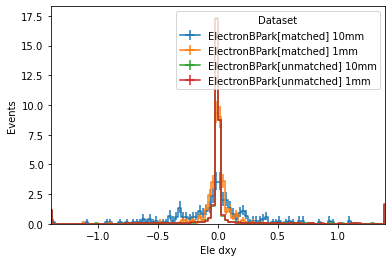

In [5]:
histo_dxy = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("dxy", "Ele dxy", 100, -1.39, 1.39),
        )
histo_dxy.fill(dataset ="ElectronBPark[matched] 1mm", dxy = cut_pt(matched_eles_1mm).dxy.flatten())
histo_dxy.fill(dataset ="ElectronBPark[unmatched] 1mm", dxy = cut_pt(unmatched_eles_1mm).dxy.flatten())
histo_dxy.fill(dataset ="ElectronBPark[matched] 10mm", dxy = cut_pt(matched_eles_10mm).dxy.flatten())
histo_dxy.fill(dataset ="ElectronBPark[unmatched] 10mm", dxy = cut_pt(unmatched_eles_10mm).dxy.flatten())
%matplotlib inline
ax_dxy = hist.plot1d(histo_dxy, density = True, overflow="all")
ax_dxy.set_xlim(right=1.4, left=-1.4)

(-20.0, 20.0)

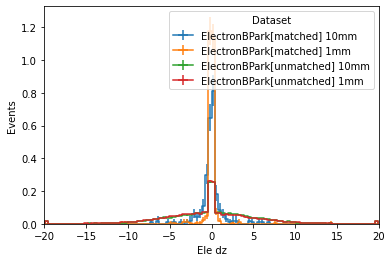

In [6]:
histo_dz = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("dz", "Ele dz", 100, -19.5, 19.5),
        )
histo_dz.fill(dataset ="ElectronBPark[matched] 1mm", dz = cut_pt(matched_eles_1mm).dz.flatten())
histo_dz.fill(dataset ="ElectronBPark[unmatched] 1mm", dz = cut_pt(unmatched_eles_1mm).dz.flatten())
histo_dz.fill(dataset ="ElectronBPark[matched] 10mm", dz = cut_pt(matched_eles_10mm).dz.flatten())
histo_dz.fill(dataset ="ElectronBPark[unmatched] 10mm", dz = cut_pt(unmatched_eles_10mm).dz.flatten())
%matplotlib inline
ax_dz = hist.plot1d(histo_dz, density = True, overflow="all")
ax_dz.set_xlim(right=20, left=-20)

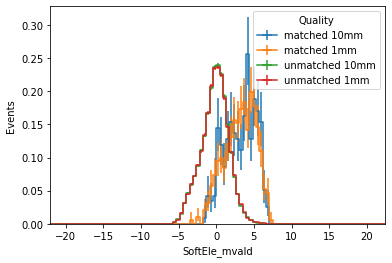

In [7]:
histo_mvaId = hist.Hist(
            "Events ",
            hist.Cat("quality", "Quality"),
            hist.Bin("soft_unmatched_ele", "SoftEle_mvaId", 100, -22, 22),
        )

histo_mvaId.fill(quality ="matched 1mm", soft_unmatched_ele=cut_pt(matched_eles_1mm).mvaId.flatten())
histo_mvaId.fill(quality ="unmatched 1mm", soft_unmatched_ele=cut_pt(unmatched_eles_1mm).mvaId.flatten())
histo_mvaId.fill(quality ="matched 10mm", soft_unmatched_ele=cut_pt(matched_eles_10mm).mvaId.flatten())
histo_mvaId.fill(quality ="unmatched 10mm", soft_unmatched_ele=cut_pt(unmatched_eles_10mm).mvaId.flatten())


%matplotlib inline
hist.plot1d(histo_mvaId, overflow = "over", density = True)

(0.0, 700.0)

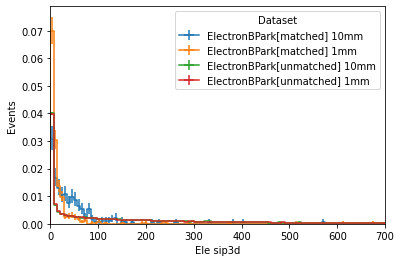

In [8]:
histo_sip3d = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("sip3d", "Ele sip3d", 100, 0, 700),
        )
histo_sip3d.fill(dataset ="ElectronBPark[matched] 1mm", sip3d = cut_pt(matched_eles_1mm).sip3d.flatten())
histo_sip3d.fill(dataset ="ElectronBPark[unmatched] 1mm", sip3d = cut_pt(unmatched_eles_1mm).sip3d.flatten())
histo_sip3d.fill(dataset ="ElectronBPark[matched] 10mm", sip3d = cut_pt(matched_eles_10mm).sip3d.flatten())
histo_sip3d.fill(dataset ="ElectronBPark[unmatched] 10mm", sip3d = cut_pt(unmatched_eles_10mm).sip3d.flatten())
%matplotlib inline
ax_sip3d = hist.plot1d(histo_sip3d, density = True)
ax_sip3d.set_xlim(right=700
                  , left=0)

(-25.0, 25.0)

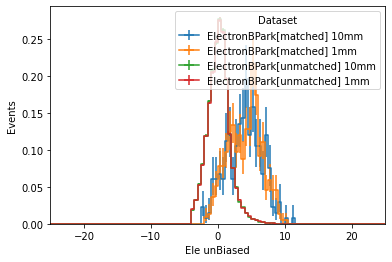

In [9]:
histo_unBiased = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("unBiased", "Ele unBiased", 100, -25, 25),
        )
histo_unBiased.fill(dataset ="ElectronBPark[matched] 1mm", unBiased = cut_pt(matched_eles_1mm).unBiased.flatten())
histo_unBiased.fill(dataset ="ElectronBPark[unmatched] 1mm", unBiased = cut_pt(unmatched_eles_1mm).unBiased.flatten())
histo_unBiased.fill(dataset ="ElectronBPark[matched] 10mm", unBiased = cut_pt(matched_eles_10mm).unBiased.flatten())
histo_unBiased.fill(dataset ="ElectronBPark[unmatched] 10mm", unBiased = cut_pt(unmatched_eles_10mm).unBiased.flatten())
%matplotlib inline
ax_unBiased = hist.plot1d(histo_unBiased, density = True, overflow="over")
ax_unBiased.set_xlim(right=25, left=-25)

(-25.0, 25.0)

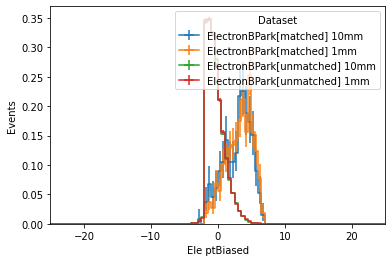

In [10]:
histo_ptBiased = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ptBiased", "Ele ptBiased", 100, -25, 25),
        )
histo_ptBiased.fill(dataset ="ElectronBPark[matched] 1mm", ptBiased = cut_pt(matched_eles_1mm).ptBiased.flatten())
histo_ptBiased.fill(dataset ="ElectronBPark[unmatched] 1mm", ptBiased = cut_pt(unmatched_eles_1mm).ptBiased.flatten())
histo_ptBiased.fill(dataset ="ElectronBPark[matched] 10mm", ptBiased = cut_pt(matched_eles_10mm).ptBiased.flatten())
histo_ptBiased.fill(dataset ="ElectronBPark[unmatched] 10mm", ptBiased = cut_pt(unmatched_eles_10mm).ptBiased.flatten())
%matplotlib inline
ax_ptBiased = hist.plot1d(histo_ptBiased, density = True, overflow="over")
ax_ptBiased.set_xlim(right=25, left=-25)

(0.0, 3.0)

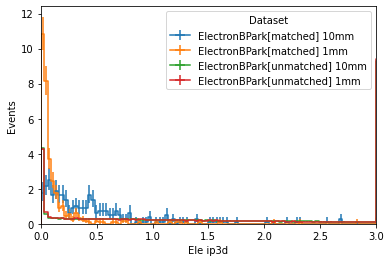

In [11]:
histo_ip3d = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ip3d", "Ele ip3d", 100, 0, 3),
        )
histo_ip3d.fill(dataset ="ElectronBPark[matched] 1mm", ip3d = cut_pt(matched_eles_1mm).ip3d.flatten())
histo_ip3d.fill(dataset ="ElectronBPark[unmatched] 1mm", ip3d = cut_pt(unmatched_eles_1mm).ip3d.flatten())
histo_ip3d.fill(dataset ="ElectronBPark[matched] 10mm", ip3d = cut_pt(matched_eles_10mm).ip3d.flatten())
histo_ip3d.fill(dataset ="ElectronBPark[unmatched] 10mm", ip3d = cut_pt(unmatched_eles_10mm).ip3d.flatten())
%matplotlib inline
ax_ip3d = hist.plot1d(histo_ip3d, density = True, overflow="all")
ax_ip3d.set_xlim(right=3, left=0)